In [41]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import sunau
from scipy import signal
from scipy.io import wavfile
import pandas as pd
import pywt
import librosa
#import python_speech_features
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import pywt # Python wavelet transform implementation
from sklearn.base import BaseEstimator, TransformerMixin # Interfaces and base classes for pipeline components
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.fft import fft, ifft
import SignalTransformers as st
from kymatio.sklearn import Scattering1D
from Multiclass_confusion_matrix import plot_confusion_matrix

In [9]:
def loadAudio(audioPath):
    sample_rate, samples = wavfile.read(audioPath)
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    spectrogram = np.log(spectrogram)
    transposed_spec = spectrogram.transpose()
    freq_list = list(frequencies)
    #freq_list = [str(f) for f in freq_list]
    #freq_list = [f + " Hz" for f in freq_list]
    spectrogram_df = pd.DataFrame(transposed_spec, index = times, columns = freq_list )
    spectrogram_df.index = times
    spectrogram_df
    return [spectrogram_df, samples, sample_rate]


def loadWaveToArray(audioPath):
    sample_rate, samples = wavfile.read(audioPath)
    return samples


def loadWaveToArrayWithFilter(audioPath, upper_bound, lower_bound):
    sample_rate, samples = wavfile.read(audioPath)
    if samples.shape[0] < upper_bound and samples.shape[0] > lower_bound:
        return samples
    else:
        return np.empty(0)

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
def assess_classification_model(y_true, y_pred):
    print("y_true")
    print(y_true)
    print("y_pred")
    print(y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot()
    plt.show()
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='micro')
    precision = precision
    recall = recall
    f1 = f1
    support = support
    print((precision, recall, f1, support))

In [11]:
import glob
paths = glob.glob("C:\\Users\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\*.wav")
paths

['C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\A_10002_1648267954995.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\A_10004_1648184247495.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\A_10009_1648256835696.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\A_10010_1648265600371.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\A_10010_1648304950469.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\A_10016_1648267752429.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\A_10018_1648268355291.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\A_10018_1648304985021.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\A_10025_164

In [12]:
len(paths)

17918

In [13]:
audio = [loadWaveToArrayWithFilter(path, 9001, 500) for path in paths]
audio

[array([144, 142, 140, ..., 129, 130, 129], dtype=uint8),
 array([118, 117, 116, ..., 130, 130, 129], dtype=uint8),
 array([129, 129, 129, ..., 129, 129, 129], dtype=uint8),
 array([134, 134, 135, ..., 128, 128, 127], dtype=uint8),
 array([130, 131, 131, ..., 130, 130, 130], dtype=uint8),
 array([127, 128, 127, ..., 126, 126, 127], dtype=uint8),
 array([125, 125, 123, ..., 128, 127, 127], dtype=uint8),
 array([116, 116, 115, ..., 131, 130, 131], dtype=uint8),
 array([133, 134, 135, ..., 126, 126, 127], dtype=uint8),
 array([131, 131, 131, ..., 131, 130, 130], dtype=uint8),
 array([129, 129, 129, ..., 130, 128, 129], dtype=uint8),
 array([136, 136, 135, ..., 124, 124, 124], dtype=uint8),
 array([122, 122, 122, ..., 129, 129, 128], dtype=uint8),
 array([115, 115, 116, ..., 126, 126, 126], dtype=uint8),
 array([126, 126, 127, ..., 126, 126, 125], dtype=uint8),
 array([128, 128, 129, ..., 126, 126, 126], dtype=uint8),
 array([128, 126, 125, ..., 130, 129, 130], dtype=uint8),
 array([131, 1

In [14]:
paths = np.array(paths)
filtered_paths = paths[[a.any() for a in audio]]
len(filtered_paths)

17858

In [15]:
filtered_audio = []
for a in audio:
    if a.any():
        filtered_audio.append(a)
len(filtered_audio)

17858

In [16]:
MAX_SIZE_FILTERED = max([a.shape[0] for a in filtered_audio])
MAX_SIZE_FILTERED

8961

In [31]:
#using this to try to find that enormous outlier and hopefully remove it
indices = [*range(0,len(audio)-1)]
sizes = [(i, a.shape[0]) for i, a in zip(indices, audio)]
print(sizes)

[(0, 4737), (1, 3201), (2, 3201), (3, 4481), (4, 4865), (5, 4865), (6, 4865), (7, 3969), (8, 4481), (9, 4609), (10, 4465), (11, 4353), (12, 4353), (13, 4481), (14, 4353), (15, 4609), (16, 4225), (17, 4737), (18, 5121), (19, 3713), (20, 4881), (21, 5009), (22, 4380), (23, 4993), (24, 5505), (25, 4609), (26, 4993), (27, 4737), (28, 3201), (29, 3201), (30, 4097), (31, 4993), (32, 5121), (33, 4993), (34, 4977), (35, 5249), (36, 4993), (37, 5121), (38, 4721), (39, 5121), (40, 4865), (41, 5377), (42, 4865), (43, 4737), (44, 4353), (45, 5249), (46, 4609), (47, 5377), (48, 4609), (49, 5249), (50, 5249), (51, 5121), (52, 5121), (53, 5633), (54, 4641), (55, 4481), (56, 3201), (57, 3201), (58, 5121), (59, 1052), (60, 4993), (61, 5249), (62, 5249), (63, 5633), (64, 5121), (65, 4737), (66, 5377), (67, 4881), (68, 5121), (69, 4993), (70, 5121), (71, 5121), (72, 5121), (73, 5249), (74, 4737), (75, 5121), (76, 3969), (77, 4609), (78, 5121), (79, 4993), (80, 4993), (81, 4993), (82, 5121), (83, 4865), (

In [85]:
#audio.remove(audio[16989])
#audio.remove(audio[11668])
#audio.remove(audio[19185])


C:\Users\kbk17\AppData\Local\Temp\ipykernel_5524\603064757.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  audio.remove(audio[8354])


[127 127 126 ... 129 130 130]


<AxesSubplot:ylabel='Frequency'>

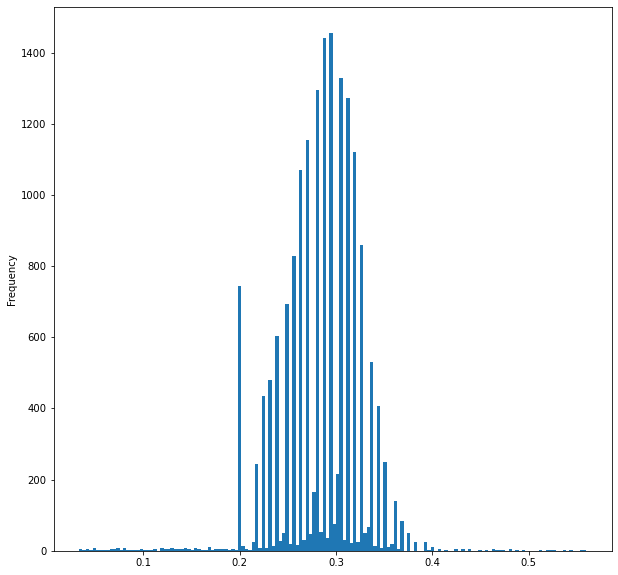

In [17]:
lengths = pd.Series([a.shape[0] for a in filtered_audio]) / 16000
lengths.plot(kind='hist', bins=150, figsize=(10,10))

In [18]:
lengths.describe()

count    17858.000000
mean         0.284155
std          0.042875
min          0.033250
25%          0.263062
50%          0.288062
75%          0.312063
max          0.560063
dtype: float64

In [ ]:
#going to try 

In [19]:
def pad_samples(a, max_sequence_length, axis, pad_value):
    return np.pad(a, (0,max_sequence_length-a.shape[axis]), 'constant', constant_values=pad_value)

In [20]:
padded_audio = [pad_samples(a, MAX_SIZE_FILTERED, 0, 0) for a in filtered_audio]
padded_audio

[array([144, 142, 140, ...,   0,   0,   0], dtype=uint8),
 array([118, 117, 116, ...,   0,   0,   0], dtype=uint8),
 array([129, 129, 129, ...,   0,   0,   0], dtype=uint8),
 array([134, 134, 135, ...,   0,   0,   0], dtype=uint8),
 array([130, 131, 131, ...,   0,   0,   0], dtype=uint8),
 array([127, 128, 127, ...,   0,   0,   0], dtype=uint8),
 array([125, 125, 123, ...,   0,   0,   0], dtype=uint8),
 array([116, 116, 115, ...,   0,   0,   0], dtype=uint8),
 array([133, 134, 135, ...,   0,   0,   0], dtype=uint8),
 array([131, 131, 131, ...,   0,   0,   0], dtype=uint8),
 array([129, 129, 129, ...,   0,   0,   0], dtype=uint8),
 array([136, 136, 135, ...,   0,   0,   0], dtype=uint8),
 array([122, 122, 122, ...,   0,   0,   0], dtype=uint8),
 array([115, 115, 116, ...,   0,   0,   0], dtype=uint8),
 array([126, 126, 127, ...,   0,   0,   0], dtype=uint8),
 array([128, 128, 129, ...,   0,   0,   0], dtype=uint8),
 array([128, 126, 125, ...,   0,   0,   0], dtype=uint8),
 array([131, 1

In [21]:
padded_audio = np.hstack(padded_audio).reshape(len(padded_audio), -1)
padded_audio

array([[144, 142, 140, ...,   0,   0,   0],
       [118, 117, 116, ...,   0,   0,   0],
       [129, 129, 129, ...,   0,   0,   0],
       ...,
       [129, 129, 130, ...,   0,   0,   0],
       [128, 129, 129, ...,   0,   0,   0],
       [136, 135, 134, ...,   0,   0,   0]], dtype=uint8)

In [22]:
X_columns = ['X_'+str(x) for x in range(0, MAX_SIZE_FILTERED)]
padded_df = pd.DataFrame(padded_audio, columns=X_columns)
padded_df

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_8951,X_8952,X_8953,X_8954,X_8955,X_8956,X_8957,X_8958,X_8959,X_8960
0,144,142,140,137,135,135,135,134,131,130,...,0,0,0,0,0,0,0,0,0,0
1,118,117,116,116,116,116,116,117,118,119,...,0,0,0,0,0,0,0,0,0,0
2,129,129,129,129,128,128,128,127,128,128,...,0,0,0,0,0,0,0,0,0,0
3,134,134,135,133,134,132,131,133,131,130,...,0,0,0,0,0,0,0,0,0,0
4,130,131,131,131,132,131,131,133,132,131,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17853,130,130,131,133,133,132,129,127,126,126,...,0,0,0,0,0,0,0,0,0,0
17854,128,127,127,127,127,127,128,128,129,129,...,0,0,0,0,0,0,0,0,0,0
17855,129,129,130,129,129,129,129,130,131,132,...,0,0,0,0,0,0,0,0,0,0
17856,128,129,129,129,127,125,125,123,125,128,...,0,0,0,0,0,0,0,0,0,0


In [23]:
upper_case_targets = [path.replace("C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\minced_typing\\", "").split("_")[0] for path in filtered_paths]
targets = [c.lower() for c in upper_case_targets]
i = 0
for t in targets:
    if t == "[comma]":
        targets[i] = ','
    if t == "[minus]":
        targets[i] = '-'
    if t == "[period]":
        targets[i] = '.'
    if t == "[space]":
        targets[i] = ' '
    i += 1
targets

['a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a'

In [24]:
print(targets)

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',

In [1]:
print(ord(' ') - ord('a'))

-65


In [26]:
#CURRENT CELL
padded_df["str_target"] = targets
integer_targets = [ord(c) - ord('a') for c in targets]
padded_df["target"] = integer_targets
padded_df["target"]

0         0
1         0
2         0
3         0
4         0
         ..
17853   -65
17854   -65
17855   -65
17856   -65
17857   -65
Name: target, Length: 17858, dtype: int64

In [27]:
padded_df["target"].value_counts()

-65    2094
 0     1819
 4     1471
 8     1455
 13    1261
 14    1184
 19    1044
 18     970
 11     960
 17     795
 2      579
 7      569
 12     464
 3      462
 20     369
 24     352
 5      327
 15     313
 22     265
 6      242
 1      200
 21     163
-51     133
-53     130
 10     101
 25      38
-52      31
 9       30
 23      25
 16      12
Name: target, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(padded_df[X_columns],padded_df["target"], test_size=0.2, random_state=42)

In [32]:
import lightgbm as lgb
parameters = {"num_leaf": [3, 7, 15, 31, 63],
                "bagging_frac": [.25, .5, .75, 1],
                "feature_frac": [.25, .5, .75, 1]
             }
lgb_pipe = Pipeline([('normalizer', st.Normalizer(8, False)), 
                 ('nfft', st.NormFFT()),
                 ('minmaxscaler', MinMaxScaler()),
                 ('lgb', lgb.LGBMClassifier())
                ])

In [33]:
lgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer(nbits=8, signed=False)),
                ('nfft', NormFFT()), ('minmaxscaler', MinMaxScaler()),
                ('lgb', LGBMClassifier())])

In [36]:
y_pred = lgb_pipe.predict(X_test)

In [44]:
matrix_labels = padded_df["target"].unique()
matrix_labels

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
       -53, -52, -51, -65], dtype=int64)

In [45]:
matrix_labels_text = padded_df["str_target"].unique()
matrix_labels_text

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
       ',', '-', '.', ' '], dtype=object)

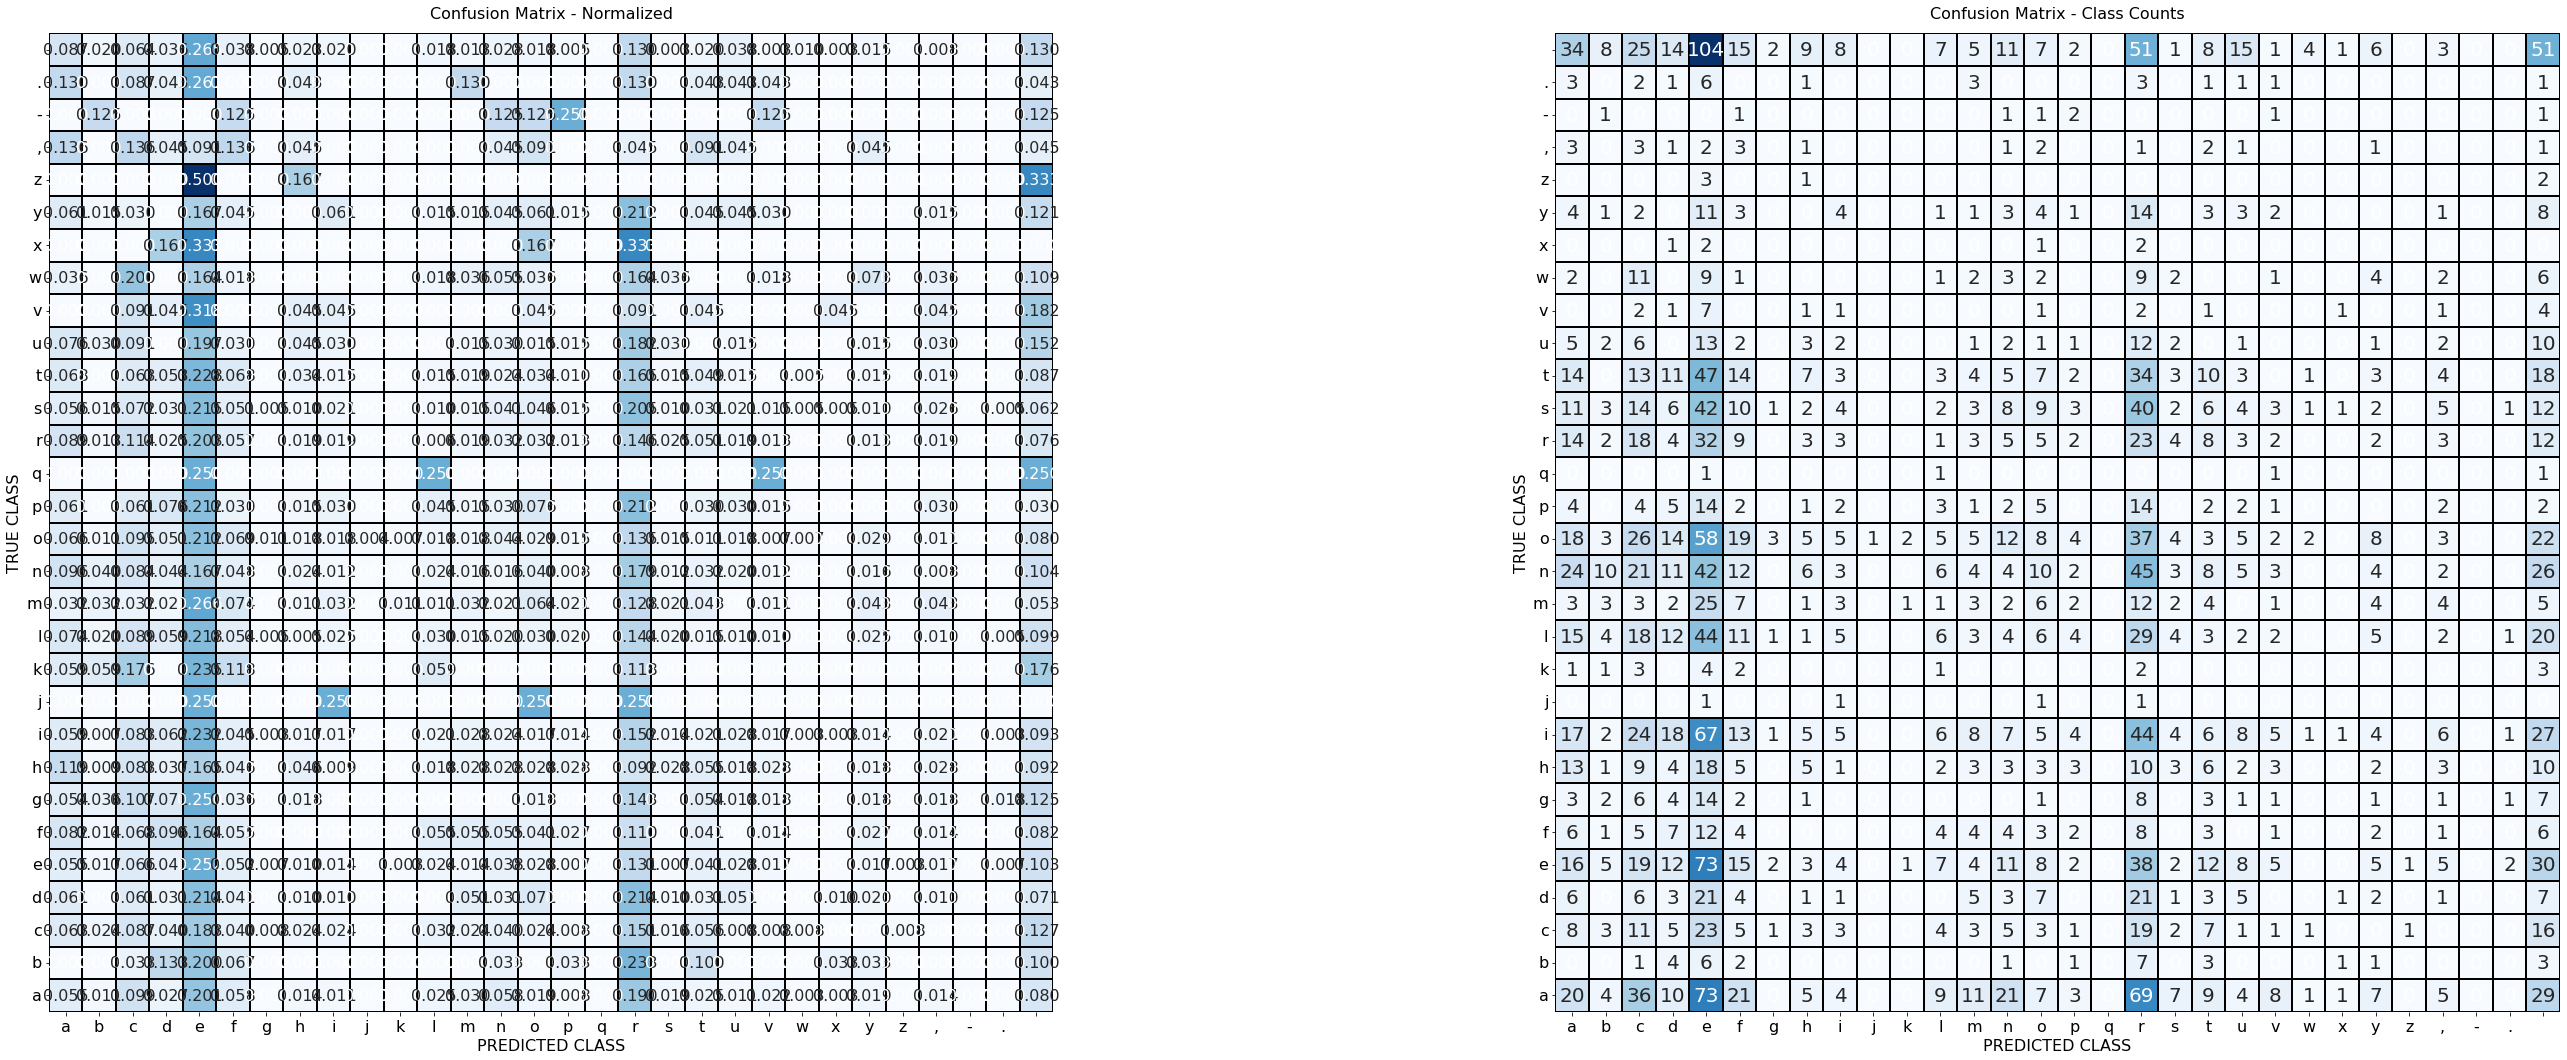

In [49]:
cm = confusion_matrix(y_test, y_pred, labels=matrix_labels)
plot_confusion_matrix(cm, matrix_labels_text, figsize=(45,18))